<a href="https://colab.research.google.com/github/mjsipes/pytorch_notebooks/blob/main/matrixregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.1+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
torch.manual_seed(42)

weight = 2
bias = 2

start = 0
end = 1
step = 0.02

x_1_1 = torch.arange(start, end, step).unsqueeze(dim=1)
X = torch.arange(start, end, step)


n_samples = X.size()[0]

X = torch.zeros((n_samples, 2, 2))
y = torch.zeros(n_samples)

for i in range(n_samples):
    X[i] = torch.rand((2, 2))
    X[i][0][0] = x_1_1[i]
    y[i] = X[i][0][0]*weight + bias

X = X.unsqueeze(dim=-1)
y = y.unsqueeze(dim=1)

X.dtype, y.dtype, X.shape, y.shape, X.ndim, X[:2],y[:2]


(torch.float32,
 torch.float32,
 torch.Size([50, 2, 2, 1]),
 torch.Size([50, 1]),
 4,
 tensor([[[[0.0000],
           [0.9150]],
 
          [[0.3829],
           [0.9593]]],
 
 
         [[[0.0200],
           [0.6009]],
 
          [[0.2566],
           [0.7936]]]]),
 tensor([[2.0000],
         [2.0400]]))

In [4]:
train_split = int(0.8 * len(X))
# X, y = shuffle(X, y, random_state=42)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 2, 2, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 2, 2, 1]),
 torch.Size([10, 1]))

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  train_data_00 = train_data[:, 0, 0]
  train_data_01 = train_data[:, 0, 1]
  train_data_10 = train_data[:, 1, 0]
  train_data_11 = train_data[:, 1, 1]
  plt.scatter(train_data_00, train_labels, c="b", s=4, label="Training data")
  plt.scatter(train_data_01, train_labels, c='0.8', s=4)
  plt.scatter(train_data_10, train_labels, c='0.8', s=4)
  plt.scatter(train_data_11, train_labels, c='0.8', s=4, label="Training data")

  test_data_00 = test_data[:, 0, 0]
  test_data_01 = test_data[:, 0, 1]
  test_data_10 = test_data[:, 1, 0]
  test_data_11 = test_data[:, 1, 1]
  plt.scatter(test_data_00, test_labels, c="g", s=4, label="Testing data")
  plt.scatter(test_data_01, test_labels, c='0.8', s=4)
  plt.scatter(test_data_10, test_labels, c='0.8', s=4)
  plt.scatter(test_data_11, test_labels, c='0.8', s=4, label="Testing data")

  if predictions is not None:
    train_data_00 = train_data[:, 0, 0].squeeze(-1)
    test_data_00 = test_data[:, 0, 0].squeeze(-1)
    combined_data_00 = torch.cat((train_data_00, test_data_00), dim=0)
    plt.scatter(combined_data_00, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

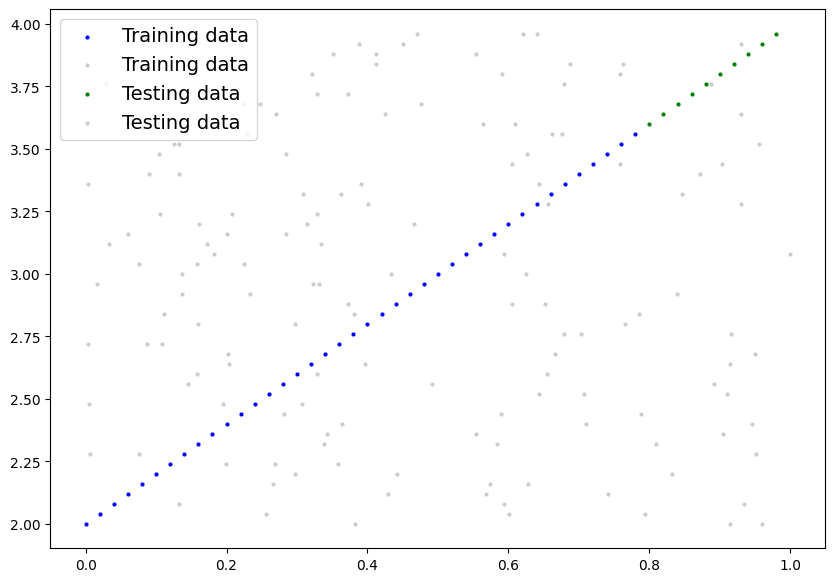

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
class MatrixSolver0(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight0 = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.weight1 = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.weight2 = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.weight3 = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight0 * x[:, 0, 0] + self.weight1 * x[:, 0, 1] + self.weight2 * x[:, 1, 0] + self.weight3 * x[:, 1, 1] + self.bias


torch.manual_seed(42)
model_0 = MatrixSolver0()

with torch.no_grad():
  model_0.weight0[0] = 10
  model_0.weight1[0] = 0
  model_0.weight2[0] = 0
  model_0.weight3[0] = 0
  model_0.bias[0] = 10


model_0, model_0.state_dict()

(MatrixSolver0(),
 OrderedDict([('weight0', tensor([10.])),
              ('weight1', tensor([0.])),
              ('weight2', tensor([0.])),
              ('weight3', tensor([0.])),
              ('bias', tensor([10.]))]))

In [8]:
import torch
import torch.nn as nn

class MatrixSolver(nn.Module):
    def __init__(self):
        super(MatrixSolver, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(in_features=4, out_features=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        return x

torch.manual_seed(42)
model_1 = MatrixSolver()

with torch.no_grad():
    model_1.layer1.weight[:,:] = 0
    model_1.layer1.weight[:,0] = 10
    model_1.layer1.bias[0] = 10

model_1, model_1.state_dict()


(MatrixSolver(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (layer1): Linear(in_features=4, out_features=1, bias=True)
 ),
 OrderedDict([('layer1.weight', tensor([[10.,  0.,  0.,  0.]])),
              ('layer1.bias', tensor([10.]))]))

In [9]:
import torch
torch.manual_seed(42)

model = model_1
epochs = 100
debug = True
PRINT10 = epochs/10

model.to(device)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()

    if epoch % PRINT10 == 0:
        if debug:
            for name, param in model.named_parameters():
                print(f'{name} - Param: {param.data}')
            for name, param in model.named_parameters():
                print(f'{name} - Gradient: {param.grad}')

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % PRINT10 == 0:
        if debug:
            print(f'Epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}')
            print('-' * 60)



layer1.weight - Param: tensor([[10.,  0.,  0.,  0.]])
layer1.bias - Param: tensor([10.])
layer1.weight - Gradient: tensor([[0.3900, 0.3894, 0.5627, 0.4101]])
layer1.bias - Gradient: tensor([1.])
Epoch: 0 | Train Loss: 11.1200 | Test Loss: 14.9188
------------------------------------------------------------
layer1.weight - Param: tensor([[ 9.6100, -0.3894, -0.5627, -0.4101]])
layer1.bias - Param: tensor([9.0000])
layer1.weight - Gradient: tensor([[0.3900, 0.3894, 0.5627, 0.4101]])
layer1.bias - Gradient: tensor([1.])
Epoch: 10 | Train Loss: 9.3314 | Test Loss: 12.9068
------------------------------------------------------------
layer1.weight - Param: tensor([[ 9.2200, -0.7789, -1.1254, -0.8203]])
layer1.bias - Param: tensor([8.0000])
layer1.weight - Gradient: tensor([[0.3900, 0.3894, 0.5627, 0.4101]])
layer1.bias - Gradient: tensor([1.])
Epoch: 20 | Train Loss: 7.5428 | Test Loss: 10.8949
------------------------------------------------------------
layer1.weight - Param: tensor([[ 8.830

In [10]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('layer1.weight', tensor([[ 6.7607, -1.9372, -3.2215, -1.7043]])),
             ('layer1.bias', tensor([3.7850]))])


In [11]:
model.eval()

with torch.inference_mode():
    y_preds = model(X)

y_preds[:10]

tensor([[-0.8559],
        [ 0.5770],
        [-0.2250],
        [-0.0284],
        [ 1.2860],
        [ 1.2321],
        [ 2.5785],
        [ 1.5258],
        [ 1.2705],
        [ 0.8805]])

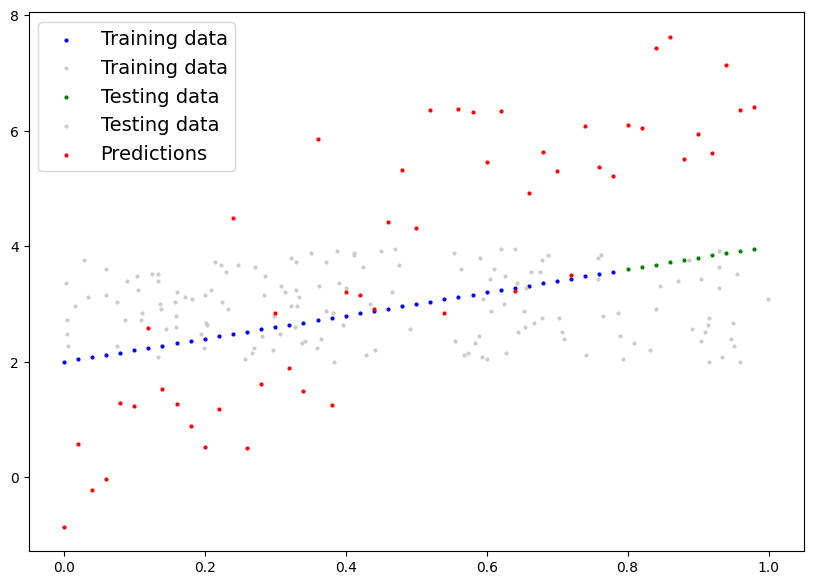

In [12]:
plot_predictions(predictions=y_preds.cpu())


In [13]:
weights = model_1.state_dict()['layer1.weight'][0]
bias = model_1.state_dict()['layer1.bias'][0]
for i in range(10): #fix!
  print(f"Target: {y[i][0]:.2f} | Prediction: {y_preds[i][0]} == {X[i][0][0][0]:.2f} * {weights[0]:.2f} + {X[i][0][1][0]:.2f} * {weights[1]:.2f} + {X[i][1][0][0]:.2f} * {weights[2]:.2f} + {X[i][1][1][0]:.2f} * {weights[3]:.2f} + {bias:.2f}")

Target: 2.00 | Prediction: -0.8558573722839355 == 0.00 * 6.76 + 0.92 * -1.94 + 0.38 * -3.22 + 0.96 * -1.70 + 3.78
Target: 2.04 | Prediction: 0.5770263671875 == 0.02 * 6.76 + 0.60 * -1.94 + 0.26 * -3.22 + 0.79 * -1.70 + 3.78
Target: 2.08 | Prediction: -0.2250375747680664 == 0.04 * 6.76 + 0.13 * -1.94 + 0.93 * -3.22 + 0.59 * -1.70 + 3.78
Target: 2.12 | Prediction: -0.028397321701049805 == 0.06 * 6.76 + 0.57 * -1.94 + 0.74 * -3.22 + 0.43 * -1.70 + 3.78
Target: 2.16 | Prediction: 1.2859561443328857 == 0.08 * 6.76 + 0.57 * -1.94 + 0.27 * -3.22 + 0.63 * -1.70 + 3.78
Target: 2.20 | Prediction: 1.2321012020111084 == 0.10 * 6.76 + 0.44 * -1.94 + 0.30 * -3.22 + 0.83 * -1.70 + 3.78
Target: 2.24 | Prediction: 2.5785303115844727 == 0.12 * 6.76 + 0.27 * -1.94 + 0.36 * -3.22 + 0.20 * -1.70 + 3.78
Target: 2.28 | Prediction: 1.5258371829986572 == 0.14 * 6.76 + 0.01 * -1.94 + 0.95 * -3.22 + 0.08 * -1.70 + 3.78
Target: 2.32 | Prediction: 1.2704687118530273 == 0.16 * 6.76 + 0.58 * -1.94 + 0.34 * -3.22 + 0